In [8]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import warnings
sns.set(style="white")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
FIG_PATH="./figure/"
espl = pd.read_pickle("espl.pkl")
y = pd.read_pickle("y-2s.pkl")

In [10]:
print(y.unique())
print(espl.head())

['camminata' 'camminata_tasca' 'corsa' 'corsa_tasca' 'quotidiano' 'salti'
 'shake']
       intTrapz       maxA   MVDeriv      meanA
0  14398.936269  17.920838  0.001170   9.661280
1  15477.238332  19.667330  0.001723  10.383013
2  15260.431960  19.205382  0.001222  10.253074
3  14983.215855  19.026058  0.001365  10.073228
4  15871.838644  17.863954  0.001457  10.640028


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(espl, y, random_state=42)

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

DummyClassifier(strategy="stratified"): 22.8% di accuratezza


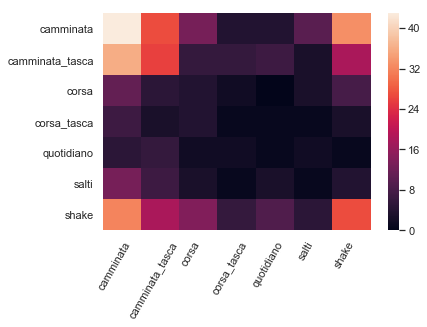

In [13]:
dc = DummyClassifier(strategy="stratified", random_state=42)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_val)

dummy_classifier_accuratezza = accuracy_score(y_val, y_pred)

print("DummyClassifier(strategy=\"stratified\"): {:.1f}% di accuratezza".format(100 * dummy_classifier_accuratezza))
sns.heatmap(confusion_matrix(y_val, y_pred), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.savefig(FIG_PATH+"confusionMatrix-Dummy.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\zagod\Anaconda3\envs\msbd\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(multi_class="multinomial"): 61.9% di accuratezza


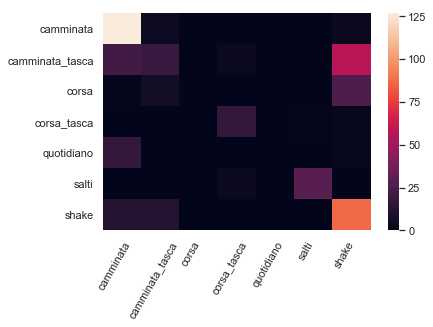

In [14]:
glmMult = LogisticRegression(penalty="l2", C=float("inf"), random_state=42, multi_class="multinomial", solver="lbfgs")
fit = glmMult.fit(X_train, y_train)
y_pred = fit.predict(X_val)

multinomial_accuratezza = accuracy_score(y_val, y_pred)
print("LogisticRegression(multi_class=\"multinomial\"): {:.1f}% di accuratezza".format(100 * multinomial_accuratezza))
sns.heatmap(confusion_matrix(y_val, y_pred), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.savefig(FIG_PATH+"confusionMatrix-Mn.png", dpi=300, bbox_inches="tight")
plt.show()